In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Stock price prediction uing Monte Carlo simulation
# We will be using Yahoo Finance to obtain historical stock price data

# Stocks included
# Technology stocks
# AAPL - Apple Inc
# MSFT - Microsoft
# GOOGL - Google
# NVDA - NVIDIA 
# TSLA - Tesla
# IBM - IBM Corporation

# Banks:
# JPM - JPMorgan Chase
# BAC - Bank of America 
# WFC - Wells Fargo & Company
# C - Citigroup Inc.
# GS - Goldman Sachs
# WFC - Wells Fargo

# Consumer Goods:
# PG - Procter & Gamble
# KO - Coca-Cola
# PEP - Pepsi
# NKE - Nike
# MCD - McDonald's
# JNJ - Johnson & Johnson

# Energy:
# XOM - Exxon Mobil
# CVX - Chevron
# SHEL - Shell plc
# BP - British Petrol
# TTE - TotalEnergies
# NEE - NextEra Energy

# Retail Trade:
# AMZN - Amazon
# WMT - Walmart
# HD - Home Depot
# TGT - Target 
# COST - Costco
# BABA- Alibaba

pd.options.display.float_format = '{:,.2f}'.format  # Set float format
pd.options.display.max_rows = None 

In [3]:
# List of chosen stocks with sectors
stocks = [
    {"ticker": "AAPL", "sector": "Technology"},
    {"ticker": "MSFT", "sector": "Technology"},
    {"ticker": "GOOGL", "sector": "Technology"},
    {"ticker": "NVDA", "sector": "Technology"},
    {"ticker": "TSLA", "sector": "Technology"},
    {"ticker": "IBM", "sector": "Technology"},

    {"ticker": "JPM", "sector": "Banks"},
    {"ticker": "BAC", "sector": "Banks"},
    {"ticker": "WFC", "sector": "Banks"},
    {"ticker": "GS", "sector": "Banks"},
    {"ticker": "MS", "sector": "Banks"},
    {"ticker": "C", "sector": "Banks"},

    {"ticker": "PG", "sector": "Consumer Goods"},
    {"ticker": "KO", "sector": "Consumer Goods"},
    {"ticker": "PEP", "sector": "Consumer Goods"},
    {"ticker": "NKE", "sector": "Consumer Goods"},
    {"ticker": "MCD", "sector": "Consumer Goods"},
    {"ticker": "JNJ", "sector": "Consumer Goods"},

    {"ticker": "XOM", "sector": "Energy"},
    {"ticker": "CVX", "sector": "Energy"},
    {"ticker": "SHEL", "sector": "Energy"},
    {"ticker": "BP", "sector": "Energy"},
    {"ticker": "TTE", "sector": "Energy"},
    {"ticker": "NEE", "sector": "Energy"},

    {"ticker": "AMZN", "sector": "Retail Trade"},
    {"ticker": "WMT", "sector": "Retail Trade"},
    {"ticker": "HD", "sector": "Retail Trade"},
    {"ticker": "TGT", "sector": "Retail Trade"},
    {"ticker": "COST", "sector": "Retail Trade"},
    {"ticker": "BABA", "sector": "Retail Trade"}
]

# Empty DataFrame to store data
combined_data = pd.DataFrame()

for stock in stocks:
    # Fetch historical data from Yahoo Finance
    stock_data = yf.download(stock["ticker"], start='1990-01-01', end='2024-05-22',progress=False)
    
    # Add Ticker and Sector columns 
    stock_data['Ticker'] = stock["ticker"]
    stock_data['Sector'] = stock["sector"]
    
    # Append data to df
    combined_data = pd.concat([combined_data, stock_data])

# Reset index and save data
combined_data.reset_index(inplace=True)
combined_data.to_csv('historical_stock_data.csv', index=False)

In [4]:
# Let's check the status of our dataframe
combined_data.head()

Date  Open  High  Low  Close  Adj Close     Volume Ticker      Sector
0 1990-01-02  0.31  0.33 0.31   0.33       0.26  183198400   AAPL  Technology
1 1990-01-03  0.34  0.34 0.33   0.33       0.26  207995200   AAPL  Technology
2 1990-01-04  0.34  0.35 0.33   0.34       0.27  221513600   AAPL  Technology
3 1990-01-05  0.34  0.34 0.33   0.34       0.27  123312000   AAPL  Technology
4 1990-01-08  0.33  0.34 0.33   0.34       0.27  101572800   AAPL  Technology

In [5]:
# Let's check our data types
combined_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Ticker               object
Sector               object
dtype: object

In [6]:
# Let's have a quick look at our summary statistics
combined_data.describe()

# We have 237k datapoints
# We have a date range of 1990 to 2024
# Average closing price is $62.26 throughout all stock, where closing prices range from 0.07 to 953 USD.

Date       Open       High        Low  \
count                         237039 237,039.00 237,039.00 237,039.00   
mean   2008-01-18 06:46:21.932087296      62.66      63.31      61.99   
min              1990-01-02 00:00:00       0.07       0.07       0.07   
25%              1999-10-27 00:00:00      17.19      17.38      17.00   
50%              2008-06-02 00:00:00      40.53      40.99      40.06   
75%              2016-07-15 00:00:00      72.53      73.29      71.85   
max              2024-05-21 00:00:00     958.51     974.00     941.03   
std                              NaN      78.06      78.90      77.18   

           Close  Adj Close           Volume  
count 237,039.00 237,039.00       237,039.00  
mean       62.66      48.26    34,280,793.52  
min         0.07       0.07             0.00  
25%        17.19      10.10     3,669,700.00  
50%        40.53      24.59     7,665,400.00  
75%        72.57      53.53    20,573,050.00  
max       953.86     953.86 7,421,640,800.00  
std        78.06      69.04   106,244,844.09

In [7]:
# Check missing values for each column
missing_values_per_column = combined_data.isnull().sum()
print("Number of missing values for each column:")
print(missing_values_per_column)

Number of missing values for each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
Sector       0
dtype: int64


In [8]:
# Taking averages of each sector for comparison
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
sector_aggregated_data = combined_data.groupby(['Sector'])[numeric_columns].mean().reset_index()

# Save aggregated data to CSV
sector_aggregated_data.to_csv('sector_aggregated_data.csv', index=False)
sector_aggregated_data.head()

Sector  Open  High   Low  Close  Adj Close         Volume
0           Banks 79.63 80.59 78.61  79.61      58.11  20,718,479.68
1  Consumer Goods 58.39 58.87 57.92  58.41      45.81   8,112,461.54
2          Energy 47.65 48.06 47.23  47.66      28.35   6,556,391.77
3    Retail Trade 68.74 69.46 68.01  68.76      60.47  31,212,821.91
4      Technology 60.19 60.93 59.44  60.21      51.61 122,082,322.48

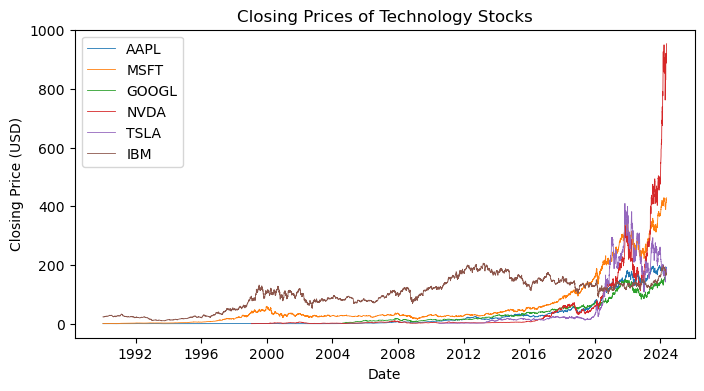

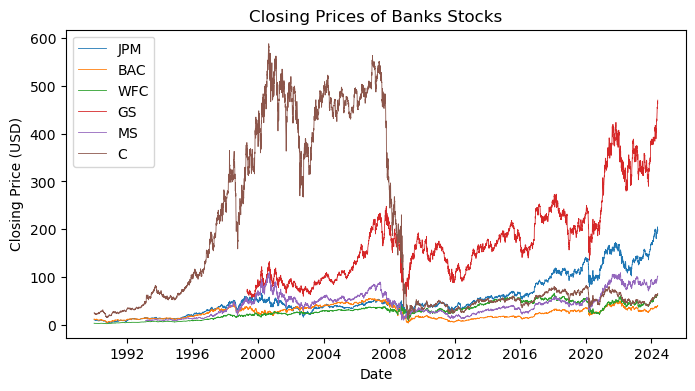

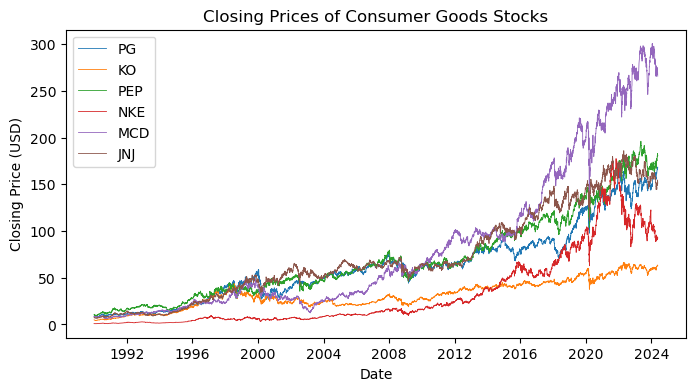

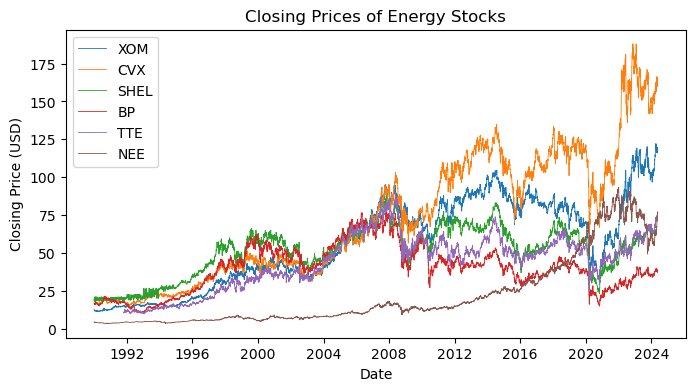

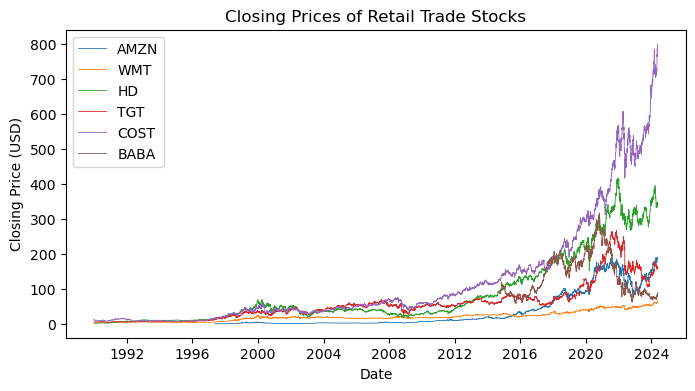

In [9]:
# Plotting closing prices for each stock, compared to other stocks in the sector
sectors = combined_data['Sector'].unique()

for sector in sectors:
    sector_stocks = [stock for stock in stocks if stock['sector'] == sector]

    plt.figure(figsize=(8, 4))
    plt.title(f'Closing Prices of {sector} Stocks')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')

    for stock in sector_stocks:
        stock_data = combined_data[combined_data['Ticker'] == stock['ticker']]
        plt.plot(stock_data['Date'], stock_data['Close'], label=stock['ticker'], linewidth=0.6)

    plt.legend()
    plt.show()

# Some observations
# We can see tech stocks were cheap for very long, they are booming after 2020, NVIDIA especially
# We can see Goldman Sachs and CitiGroup were severaly affected by the 2008 mortgage crisis
# Energy stocks all show a similar trend, with a slight decline around 2008, stable around 2008-2020, and increasing afterwards
# We see that retail stocks are also are on an upward trend after 2020, especially COSTCO

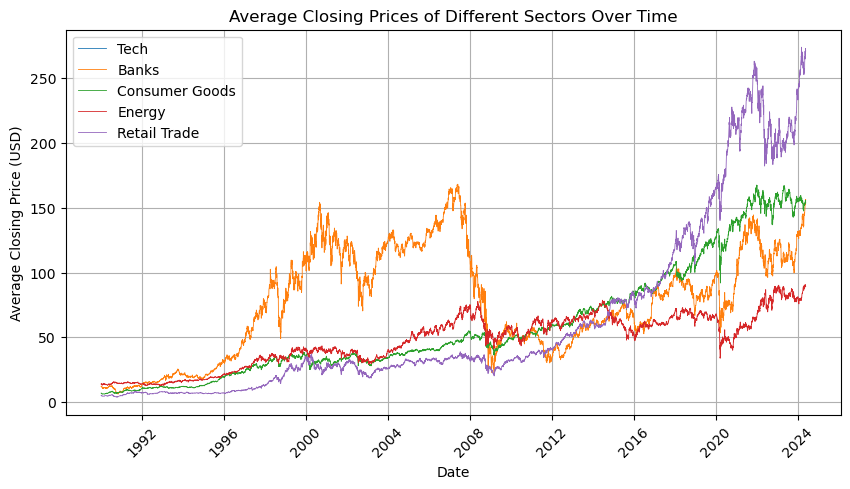

In [10]:
# Plot comparing the different sector
plt.figure(figsize=(10, 5))
# Grouping data by sector and date, then calculating the average closing price for each sector
sector_avg_data = combined_data.groupby(['Sector', 'Date'])['Close'].mean().reset_index()

# Plotting average closing prices for each sector
for sector in ['Tech', 'Banks', 'Consumer Goods', 'Energy', 'Retail Trade']:
    sector_data = sector_avg_data[sector_avg_data['Sector'] == sector]
    plt.plot(sector_data['Date'], sector_data['Close'], label=sector,linewidth=0.6)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Average Closing Price (USD)')
plt.title('Average Closing Prices of Different Sectors Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()
# This plot also reinforces our observations from the previous stock graphs

In [11]:
# Steps of Monte Carlo Simulation
# Get Historical Data: Done
# Calculate Daily Returns: We will do this now
# Simulate Future Prices: Generate multiplandom increments or decrements to the current price, based on the historical volatility of the stock.
# Calculate Metrics
# Visualize & evaluate results

In [12]:
# Calculate daily returns for each stock
for stock in stocks:
    ticker = stock["ticker"]
    combined_data.loc[combined_data['Ticker'] == ticker, 'Daily Return'] = combined_data.loc[combined_data['Ticker'] == ticker, 'Close'].pct_change()
    
# Replace NaN values with if needed
combined_data['Daily Return'] = combined_data['Daily Return'].fillna(0)

In [13]:
combined_data.describe()

Date       Open       High        Low  \
count                         237039 237,039.00 237,039.00 237,039.00   
mean   2008-01-18 06:46:21.932087296      62.66      63.31      61.99   
min              1990-01-02 00:00:00       0.07       0.07       0.07   
25%              1999-10-27 00:00:00      17.19      17.38      17.00   
50%              2008-06-02 00:00:00      40.53      40.99      40.06   
75%              2016-07-15 00:00:00      72.53      73.29      71.85   
max              2024-05-21 00:00:00     958.51     974.00     941.03   
std                              NaN      78.06      78.90      77.18   

           Close  Adj Close           Volume  Daily Return  
count 237,039.00 237,039.00       237,039.00    237,039.00  
mean       62.66      48.26    34,280,793.52          0.00  
min         0.07       0.07             0.00         -0.52  
25%        17.19      10.10     3,669,700.00         -0.01  
50%        40.53      24.59     7,665,400.00          0.00  
75%        72.57      53.53    20,573,050.00          0.01  
max       953.86     953.86 7,421,640,800.00          0.87  
std        78.06      69.04   106,244,844.09          0.02

In [14]:
# Checking if daily returns were calculated correctly
for stock in stocks:
    ticker = stock["ticker"]
    stock_daily_returns = combined_data.loc[combined_data['Ticker'] == ticker, ['Date', 'Daily Return']]
    print(f"Daily Returns for {ticker}:")
    print(stock_daily_returns.head(5))

Daily Returns for AAPL:
        Date  Daily Return
0 1990-01-02          0.00
1 1990-01-03          0.01
2 1990-01-04          0.00
3 1990-01-05          0.00
4 1990-01-08          0.01
Daily Returns for MSFT:
           Date  Daily Return
8663 1990-01-02          0.00
8664 1990-01-03          0.01
8665 1990-01-04          0.03
8666 1990-01-05         -0.02
8667 1990-01-08          0.02
Daily Returns for GOOGL:
            Date  Daily Return
17326 2004-08-19          0.00
17327 2004-08-20          0.08
17328 2004-08-23          0.01
17329 2004-08-24         -0.04
17330 2004-08-25          0.01
Daily Returns for NVDA:
            Date  Daily Return
22299 1999-01-22          0.00
22300 1999-01-25          0.10
22301 1999-01-26         -0.08
22302 1999-01-27         -0.00
22303 1999-01-28         -0.00
Daily Returns for TSLA:
            Date  Daily Return
28673 2010-06-29          0.00
28674 2010-06-30         -0.00
28675 2010-07-01         -0.08
28676 2010-07-02         -0.13
28677 2010

In [15]:
# Let's also look at min,max,mean daily returns for stocks to ensure validity
returns_statistics = []

for stock in stocks:
    ticker = stock["ticker"]
    sector = stock["sector"]
    stock_daily_returns = combined_data.loc[combined_data['Ticker'] == ticker, 'Daily Return']
    
    max_return = stock_daily_returns.max()
    min_return = stock_daily_returns.min()
    mean_return = stock_daily_returns.mean()
    
    if sector == "Banks":
        sector_label = "BP"
    else:
        sector_label = sector
    
    returns_statistics.append({
        'Stock': ticker,
        'Sector': sector_label,
        'Max Return': max_return,
        'Min Return': min_return,
        'Mean Return': mean_return
    })
returns_statistics_df = pd.DataFrame(returns_statistics)
returns_statistics_df.head()
# Everything seems ok, we can move forward with the next step, which is to simulate future prices

Stock      Sector  Max Return  Min Return  Mean Return
0   AAPL  Technology        0.33       -0.52         0.00
1   MSFT  Technology        0.20       -0.16         0.00
2  GOOGL  Technology        0.20       -0.12         0.00
3   NVDA  Technology        0.42       -0.35         0.00
4   TSLA  Technology        0.24       -0.21         0.00

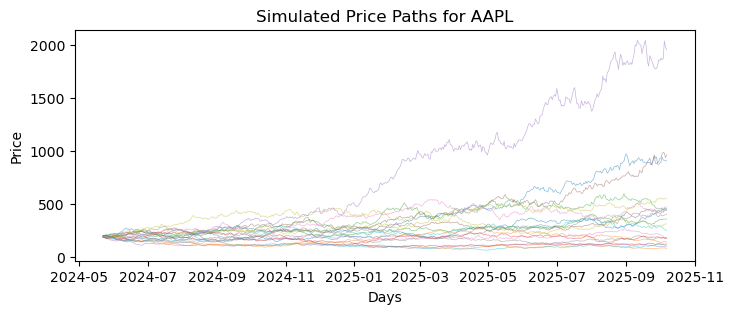

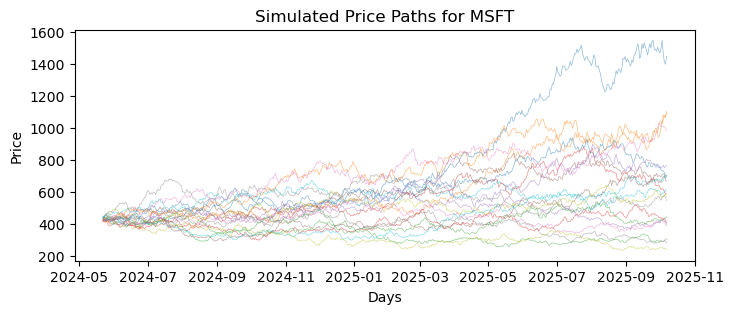

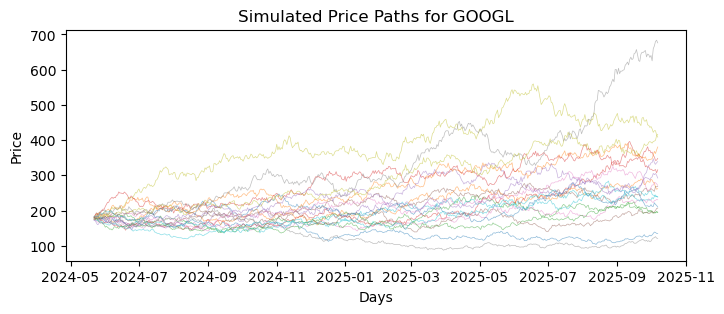

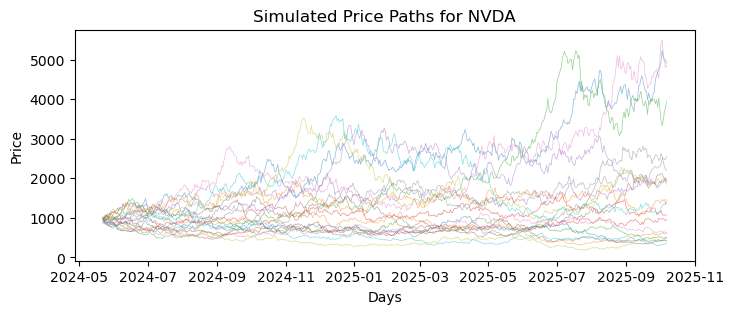

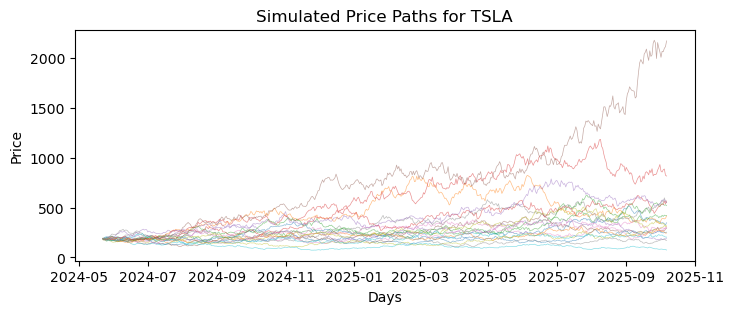

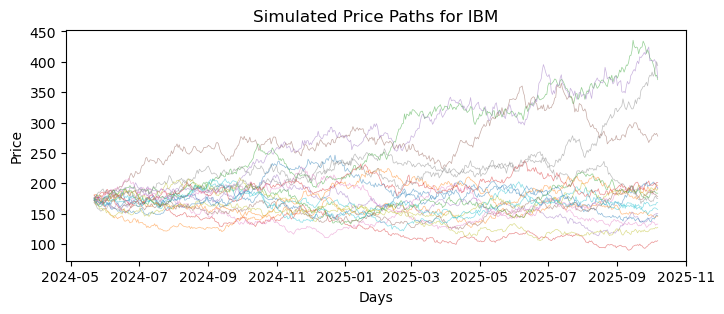

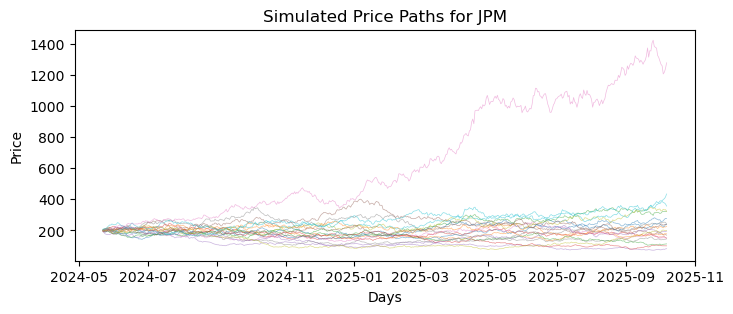

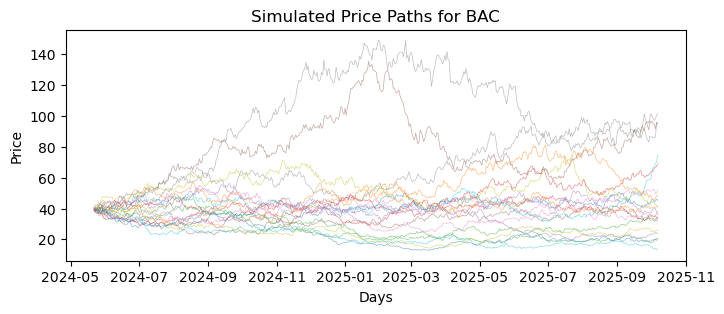

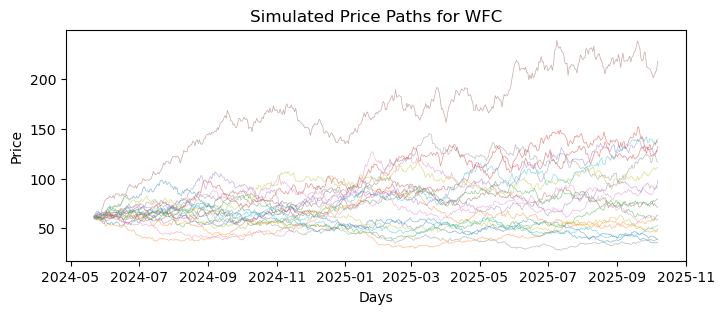

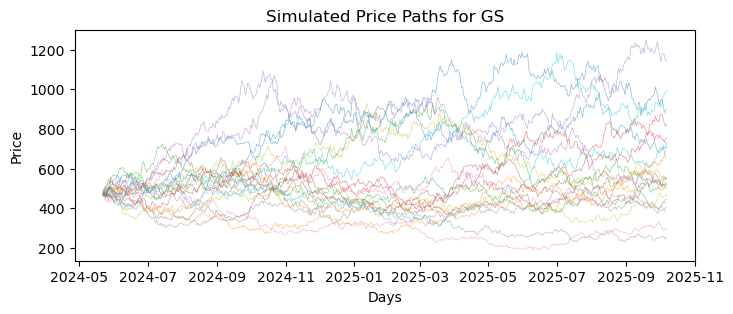

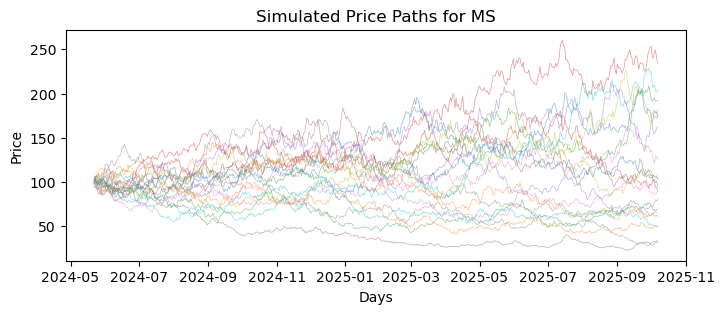

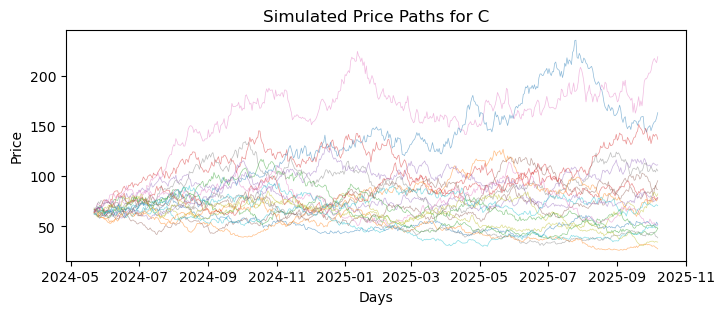

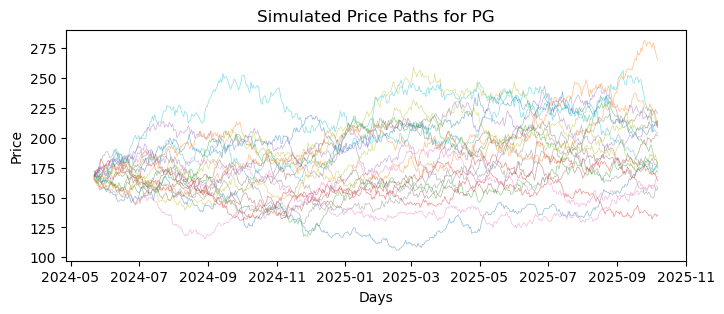

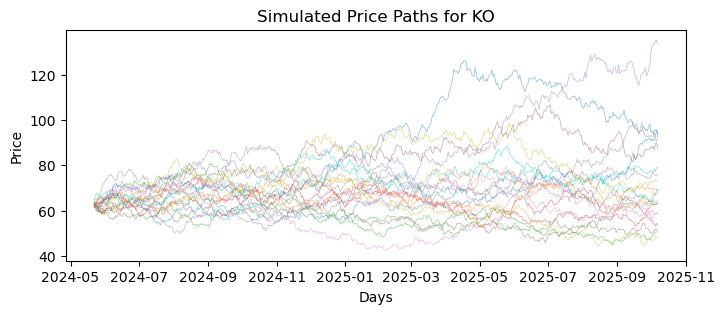

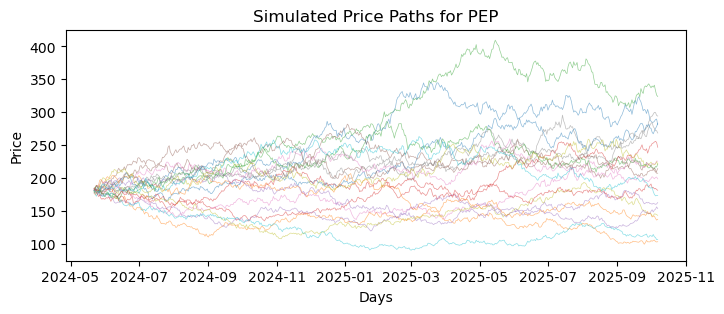

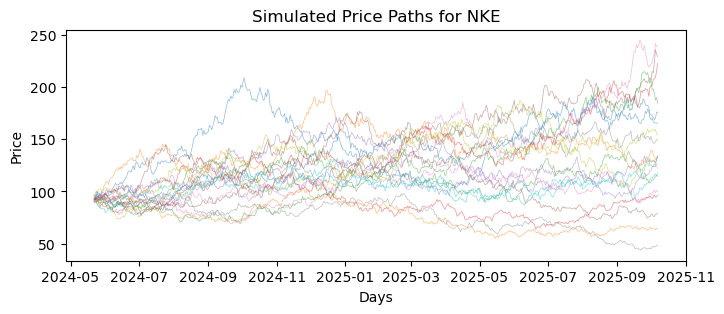

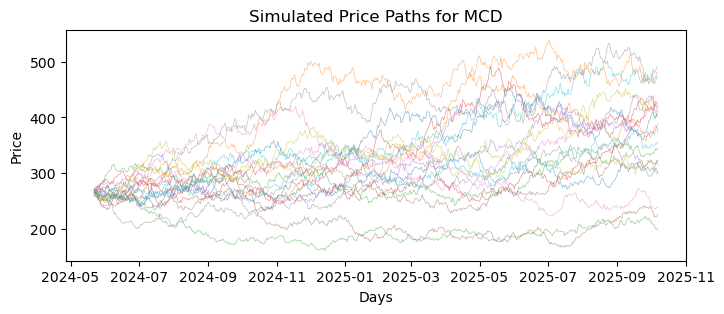

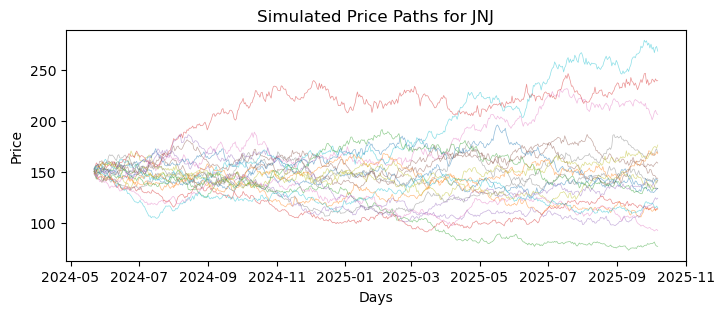

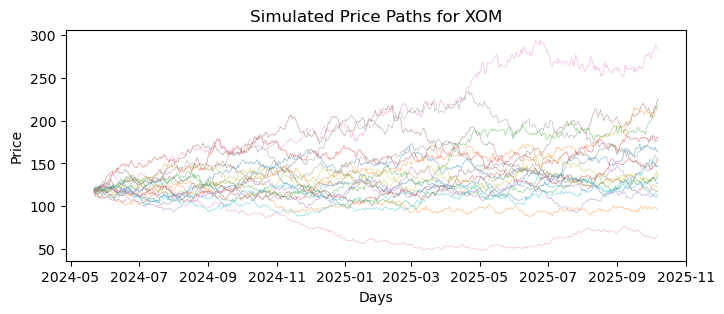

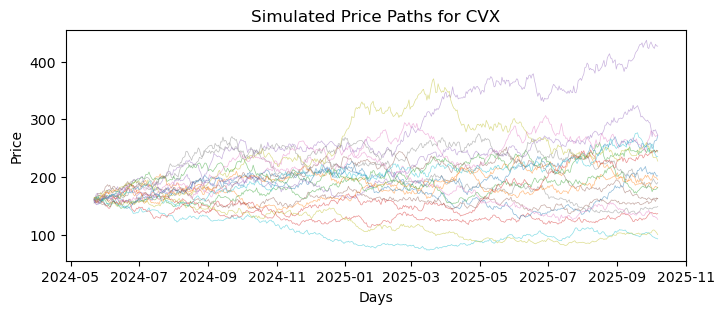

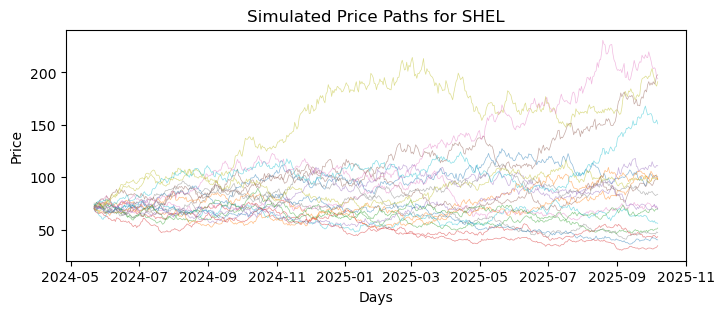

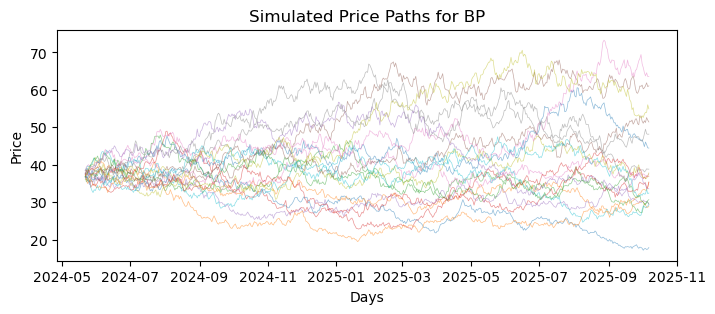

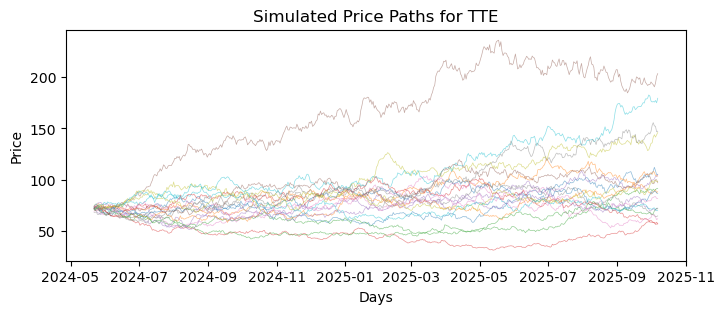

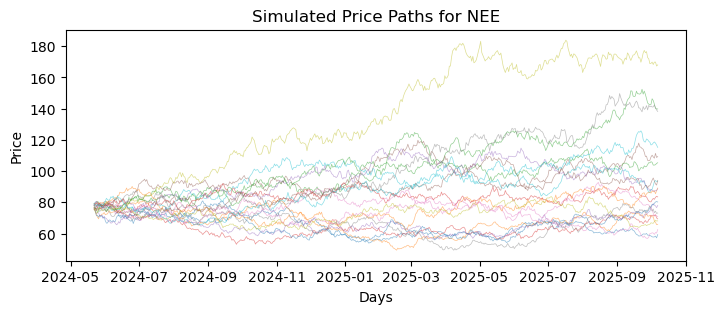

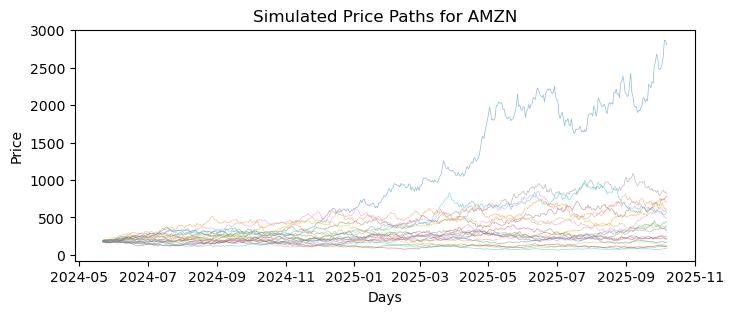

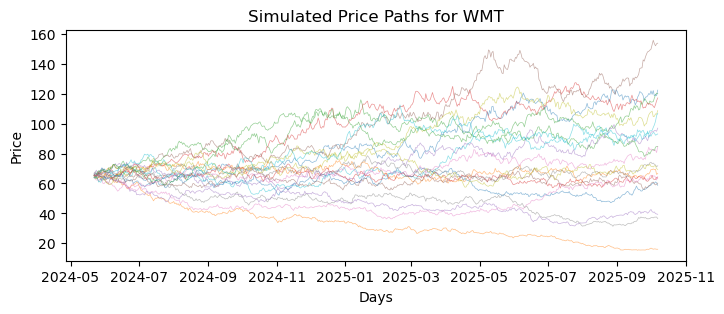

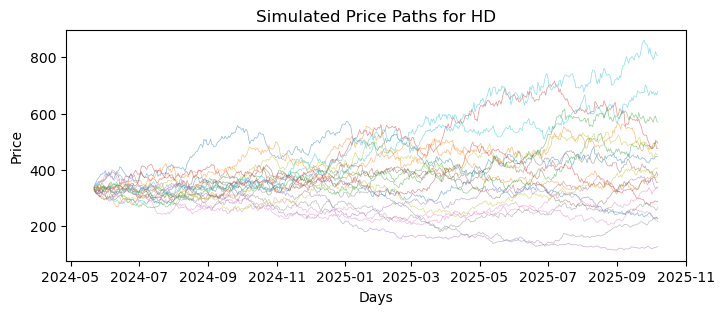

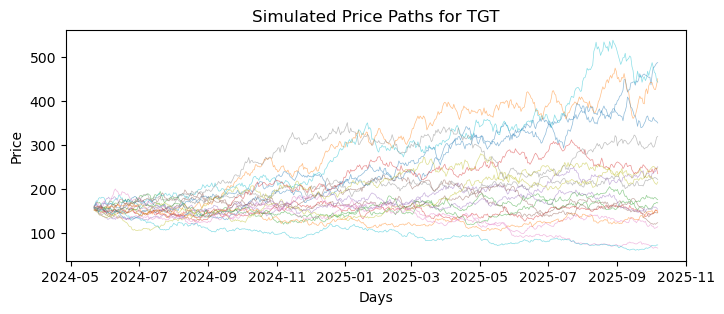

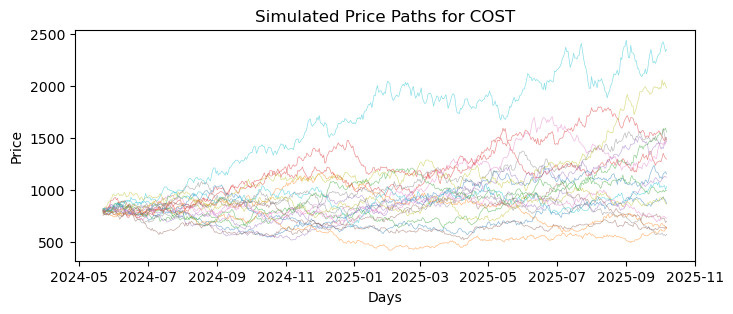

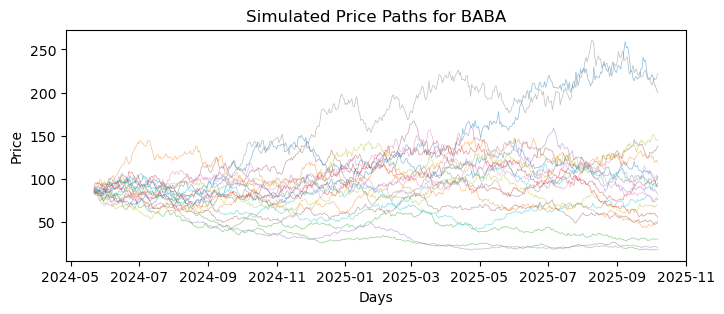

In [16]:
# Parameters
num_simulations = 20  # Number of simulations
num_days = 504  # Number of future days to simulate

# Dictionary to store simulated price paths for each stock
simulated_price_paths_per_stock = {}

# Monte Carlo simulation for each stock
for stock in stocks:
    ticker = stock["ticker"]
    
    # Historical daily returns for the current stock
    historical_returns = combined_data.loc[combined_data['Ticker'] == ticker, 'Daily Return'].dropna().values
    
    # Mean and standard deviation of daily returns for the current stock
    mean_return = historical_returns.mean()
    std_return = historical_returns.std()
    
    # Set initial price to the last known price in the historical data for the current stock
    initial_price = combined_data.loc[combined_data['Ticker'] == ticker, 'Close'].iloc[-1]
    
    # Initialize array to store simulated price paths for the current stock
    simulated_price_paths = np.zeros((num_simulations, num_days + 1))  # Increase num_days by 1 to account for initial price
    
    # Perform Monte Carlo simulation for the current stock
    for i in range(num_simulations):
        # Initialize price path for simulation i
        simulated_price_path = np.zeros(num_days + 1)  # Increase num_days by 1 to account for initial price
        simulated_price_path[0] = initial_price
        
        # Generate random daily returns based on historical mean and standard deviation
        random_returns = np.random.normal(mean_return, std_return, num_days)
        
        # Calculate future prices
        for j in range(1, num_days + 1):
            simulated_price_path[j] = simulated_price_path[j - 1] * (1 + random_returns[j - 1])  # Adjust index to start from 0
        
        # Store simulated price path
        simulated_price_paths[i] = simulated_price_path
    
    # Store simulated price paths for the current stock
    simulated_price_paths_per_stock[ticker] = simulated_price_paths

# Plot simulated prices for each stock on separate plots
for ticker, simulated_price_paths in simulated_price_paths_per_stock.items():
    plt.figure(figsize=(8, 3))
    plt.title(f'Simulated Price Paths for {ticker}')
    plt.xlabel('Days')
    plt.ylabel('Price')

    # Generate future dates starting from the last known date, limited to num_days
    last_known_date = combined_data[combined_data['Ticker'] == ticker]['Date'].max()
    future_dates = [last_known_date + datetime.timedelta(days=i) for i in range(1, num_days + 1)]

    # Plot each simulation path
    for i in range(num_simulations):
        plt.plot(future_dates, simulated_price_paths[i][1:], linewidth=0.5, alpha=0.5)  # Exclude the initial price when plotting
    plt.show()

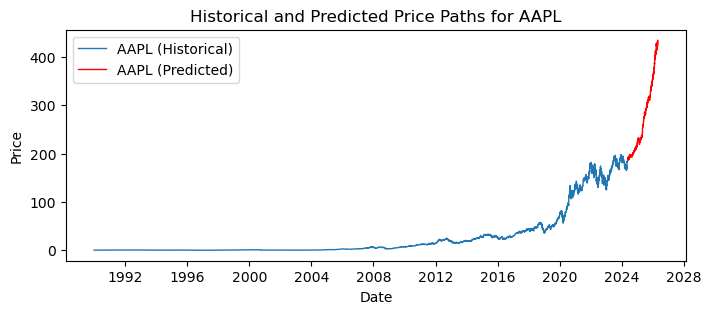

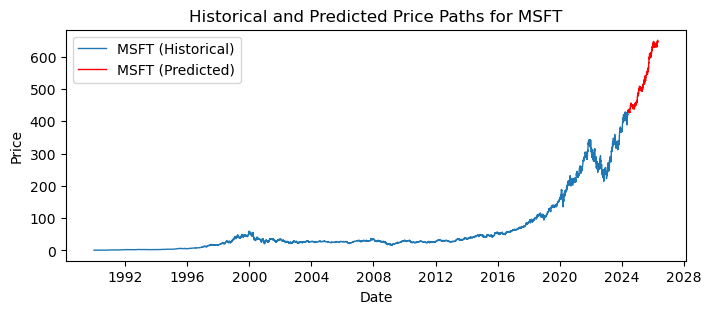

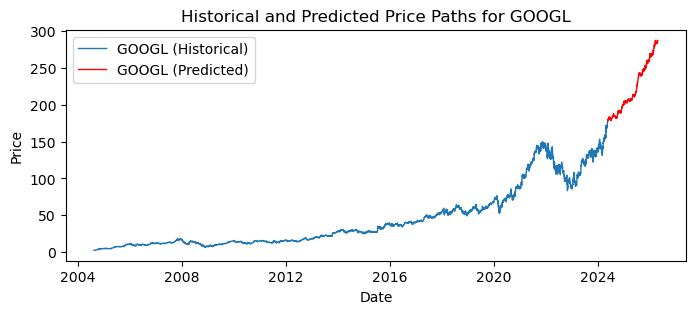

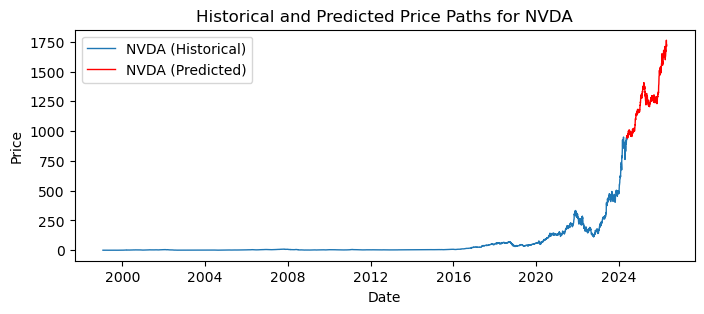

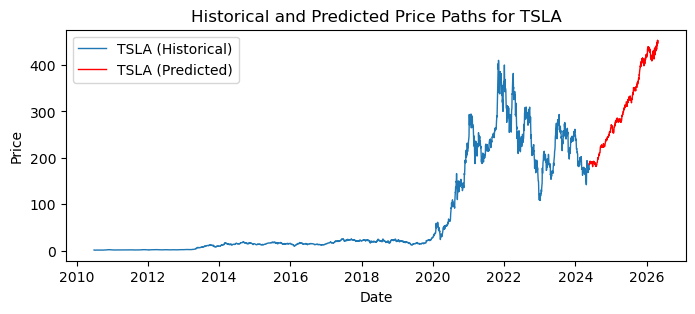

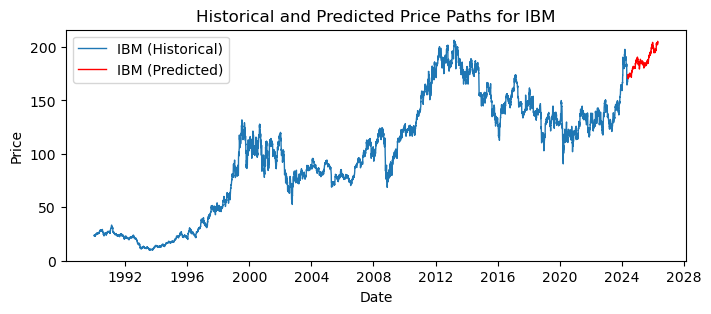

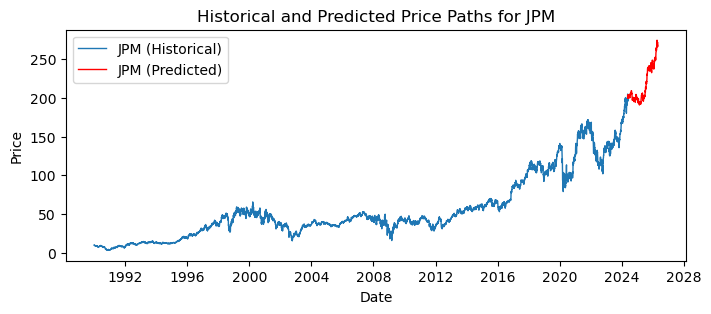

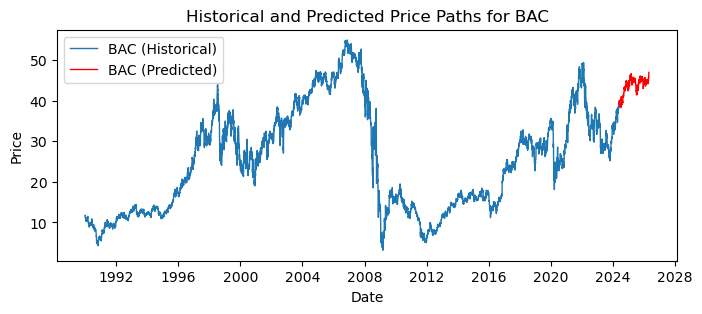

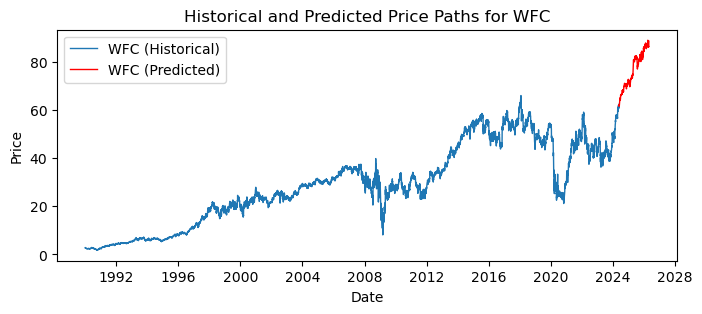

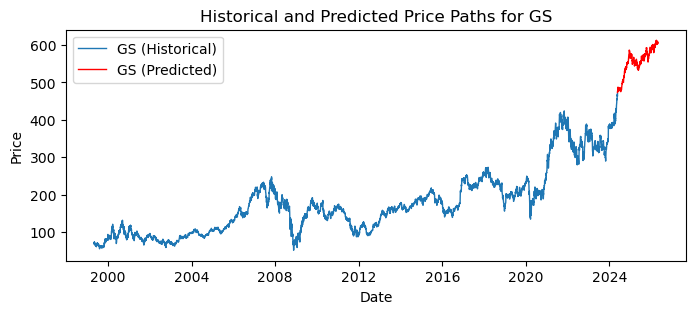

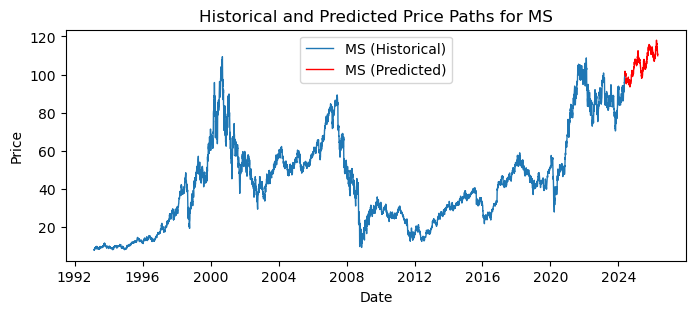

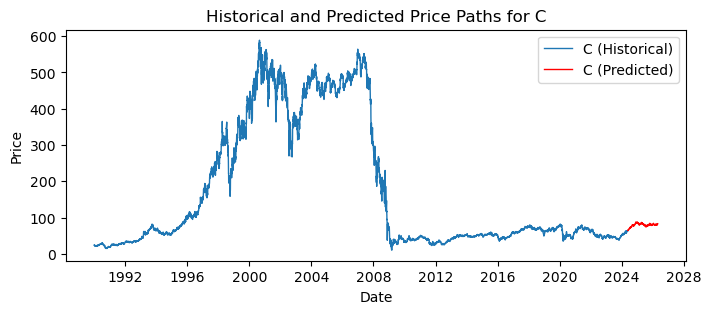

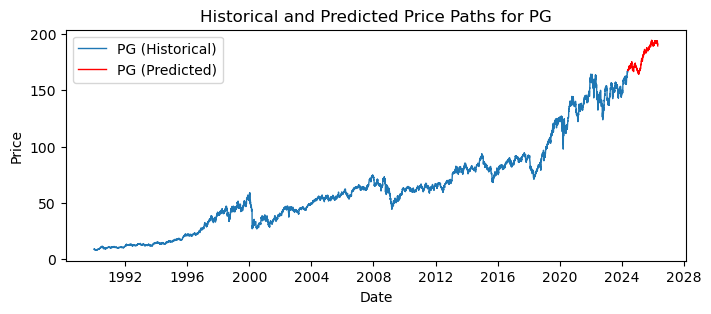

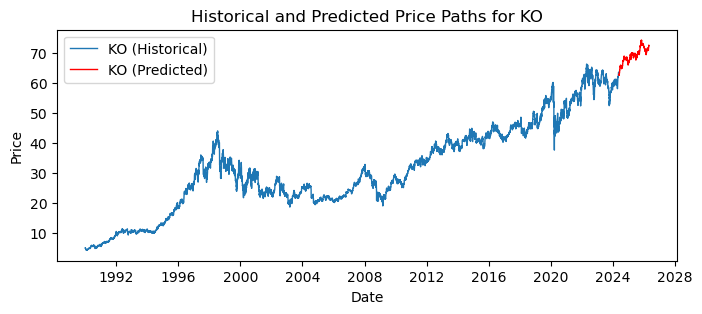

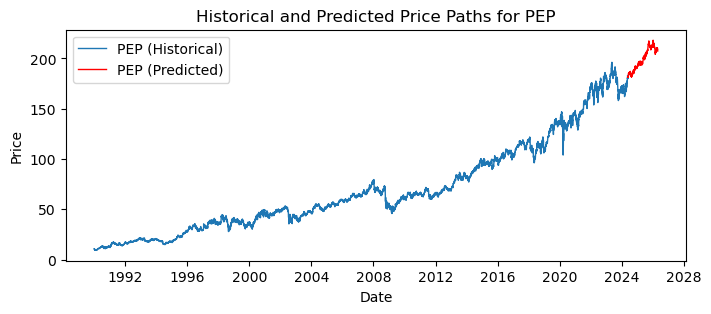

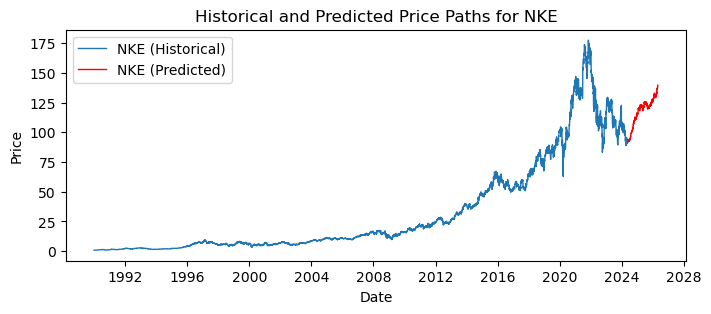

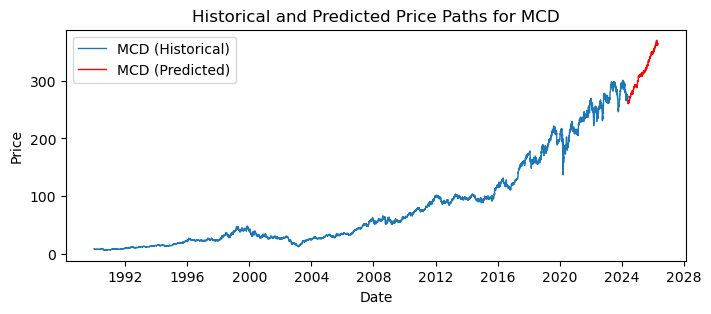

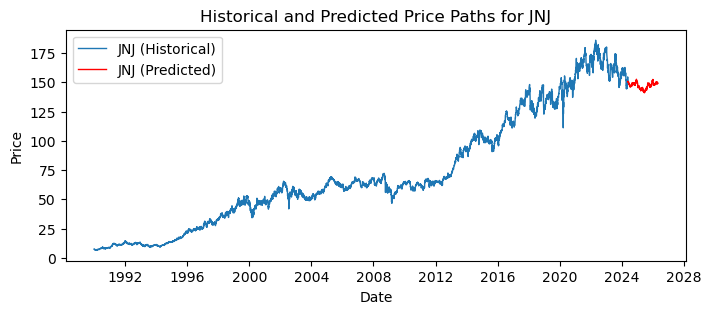

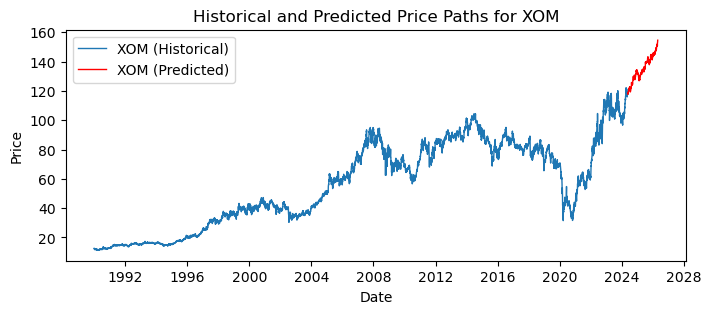

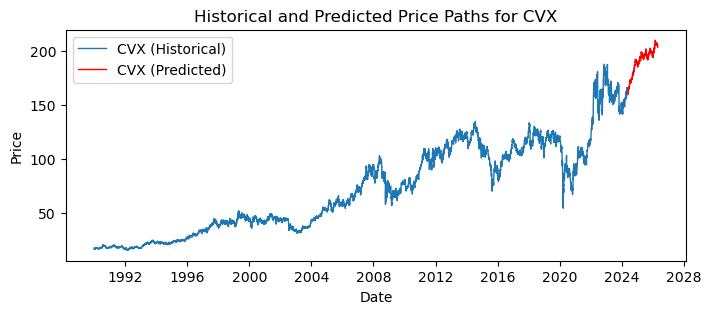

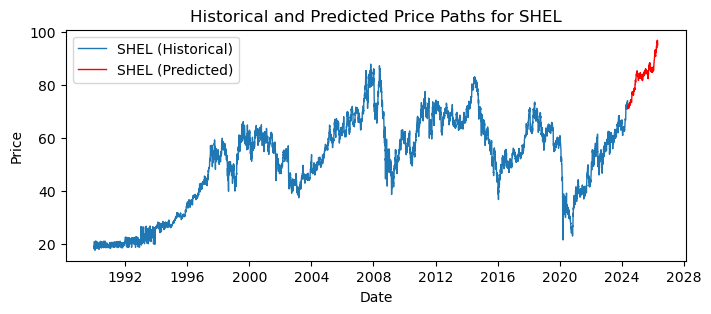

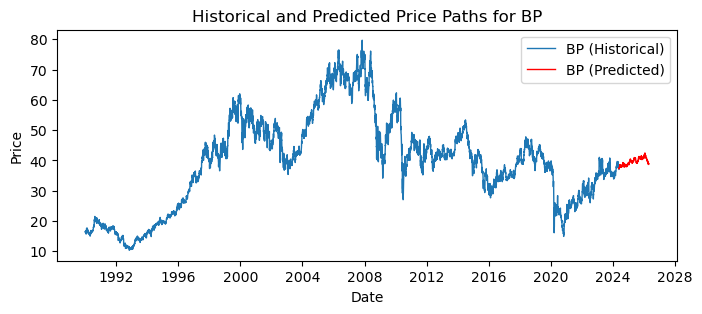

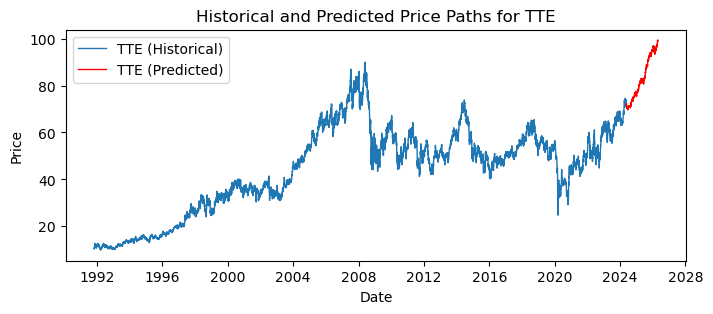

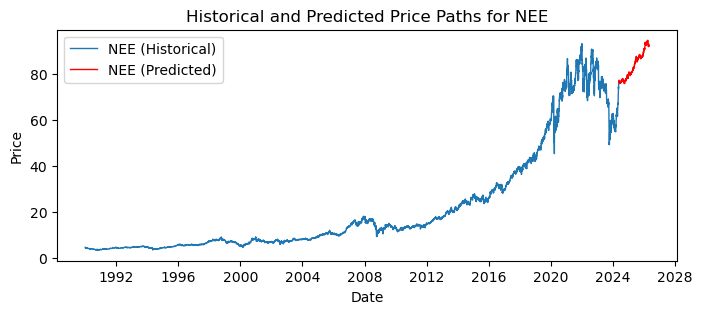

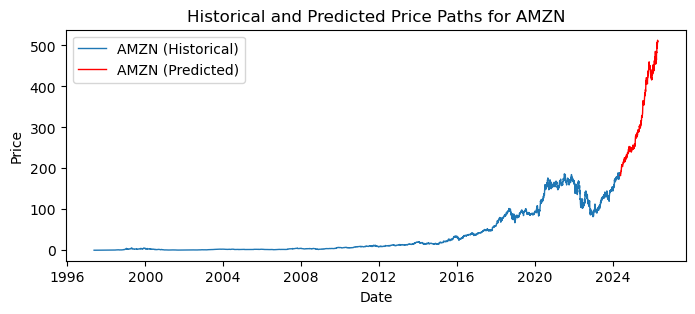

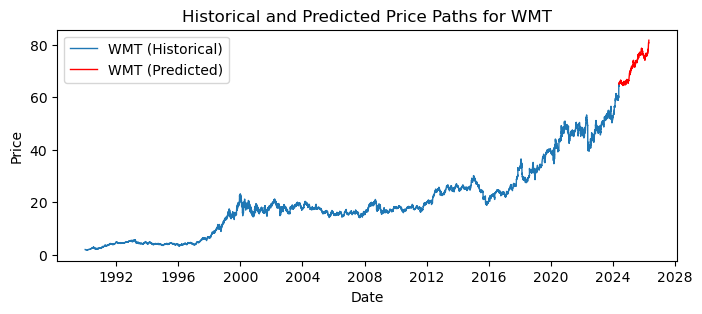

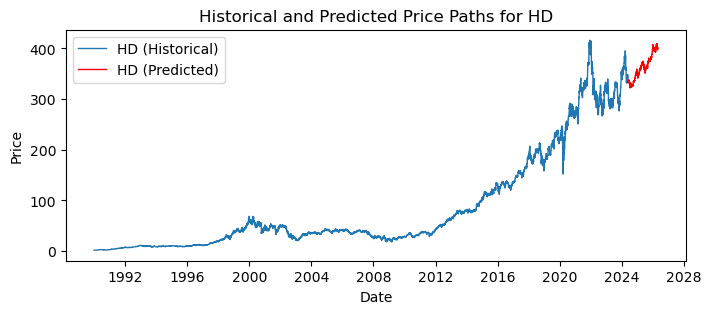

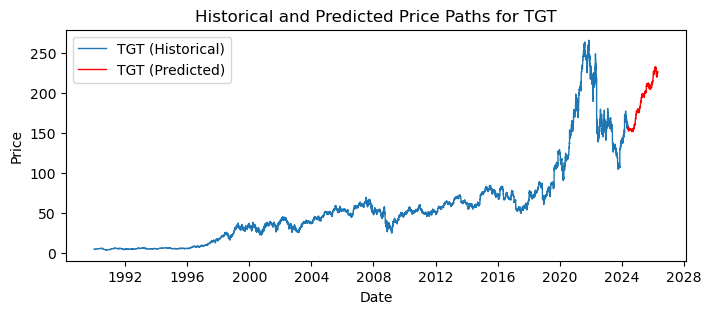

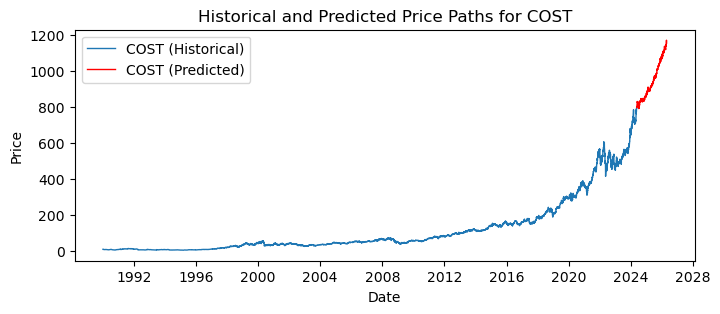

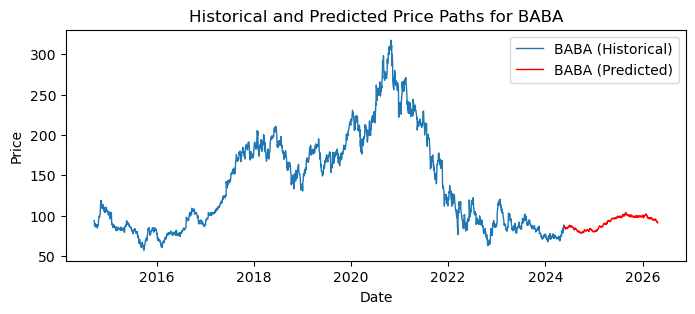

In [17]:
# Plot historical and predicted price paths for each stock
for ticker, simulated_price_paths in simulated_price_paths_per_stock.items():
    plt.figure(figsize=(8, 3))

    # Plot historical prices
    historical_data = combined_data[combined_data['Ticker'] == ticker]
    plt.plot(historical_data['Date'], historical_data['Close'], label=f'{ticker} (Historical)', linewidth=1)

    # Aggregate simulated prices for future dates
    last_known_date = historical_data['Date'].values[-1]
    avg_simulated_prices = np.mean(simulated_price_paths[:, 1:], axis=0)  # Exclude the first known price
    future_dates = pd.date_range(start=last_known_date, periods=len(avg_simulated_prices), freq='B')  # Start from the last known date
    plt.plot(future_dates, avg_simulated_prices, linewidth=1, color='red', label=f'{ticker} (Predicted)')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Historical and Predicted Price Paths for {ticker}')
    plt.legend()
    plt.show()

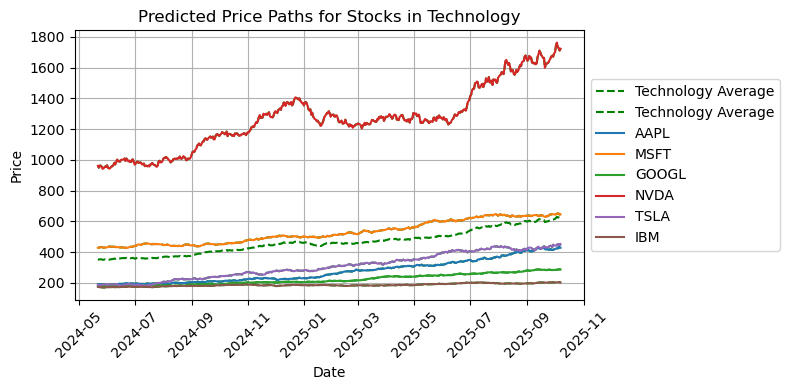

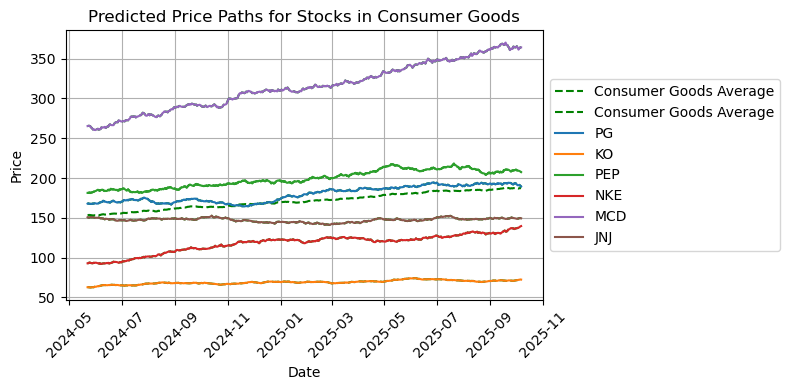

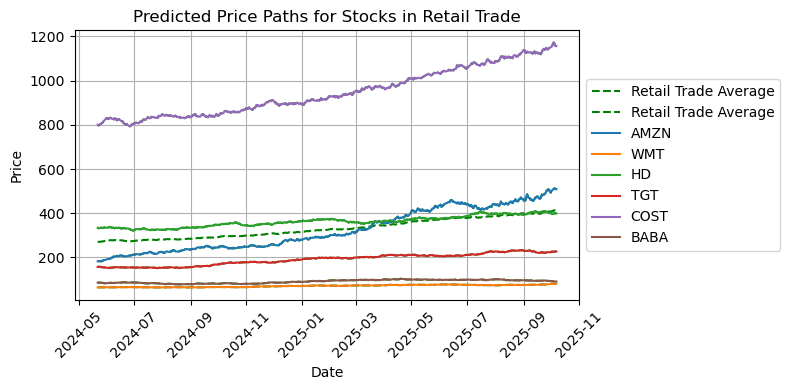

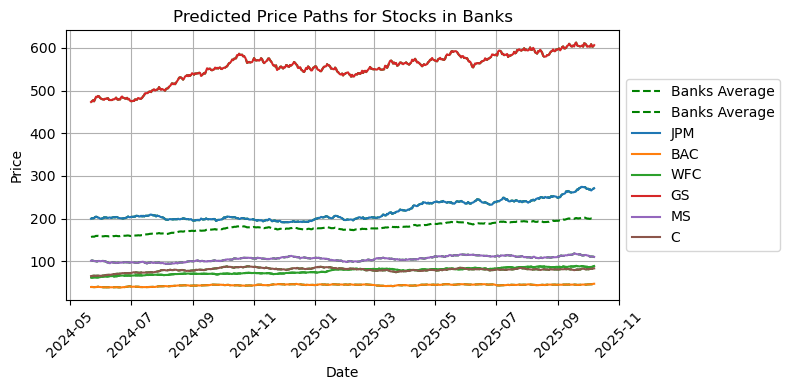

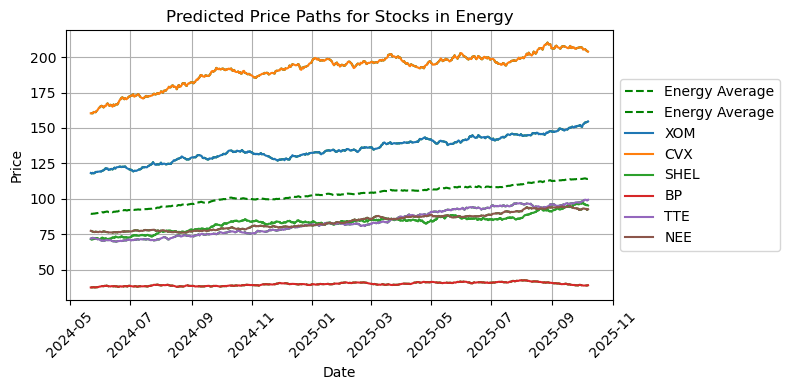

In [18]:
sector_avg_color = 'green'  
unique_sectors = set(stock["sector"] for stock in stocks)

# Predicted prices for each sector
for sector in unique_sectors:
    plt.figure(figsize=(8, 4))
    plt.title(f'Predicted Price Paths for Stocks in {sector}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    # Filter stocks belonging to the current sector
    sector_stocks = [stock["ticker"] for stock in stocks if stock["sector"] == sector]

    # Plot sector average
    sector_avg_prices = []
    for ticker in sector_stocks:
        simulated_price_paths = simulated_price_paths_per_stock[ticker]
        last_known_date = combined_data[combined_data['Ticker'] == ticker]['Date'].max()
        avg_simulated_prices = np.mean(simulated_price_paths[:, 1:], axis=0)  # Exclude the first known price    
        # Generate future dates
        future_dates = [last_known_date + datetime.timedelta(days=i) for i in range(1, len(avg_simulated_prices) + 1)]  
        # Plot sector average only for the first stock
        if ticker == sector_stocks[0]:
            plt.plot(future_dates, avg_simulated_prices, label=f'{sector} Average', color=sector_avg_color, linestyle='--')      
        else:
            plt.plot(future_dates, avg_simulated_prices, linestyle='--', color=sector_avg_color)  # Plot without label
        # Store sector average prices for later use
        sector_avg_prices.append(avg_simulated_prices)
    
    # Calculate and plot sector average
    sector_avg_prices = np.mean(sector_avg_prices, axis=0)
    future_dates = [last_known_date + datetime.timedelta(days=i) for i in range(1, len(sector_avg_prices) + 1)]
    plt.plot(future_dates, sector_avg_prices, label=f'{sector} Average', color=sector_avg_color, linestyle='--')

    # Plot predicted prices for each stock in the sector
    for ticker in sector_stocks:
        simulated_price_paths = simulated_price_paths_per_stock[ticker]
        last_known_date = combined_data[combined_data['Ticker'] == ticker]['Date'].max()
        avg_simulated_prices = np.mean(simulated_price_paths[:, 1:], axis=0)  # Exclude the first known price
        
        # Generate future dates
        future_dates = [last_known_date + datetime.timedelta(days=i) for i in range(1, len(avg_simulated_prices) + 1)]
        
        # Plot individual stock's predicted prices
        plt.plot(future_dates, avg_simulated_prices, label=ticker)

    # Move the legend to the right side
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()